Comparing the Performances of LLMs in Text Generation Using Sentiment Analysis and Zero-Shot Classification
-------------------------------------------------------------------------------------------------------

* This project tests the performance of large language models (LLMs) such as GPT-2, DistilGPT-2, and EleutherAI on text generation using sentiment analysis and zero-shot classification. A dataset of the reviews of ChatGPT is used, which includes various columns; however, I focused on two specific columns: one with the text of the reviews, and another with an integer between 1 to 5 representing the sentiment score of each review.
  
* Sentiment analysis is a computational technique used to determine the emotional tone behind a body of text. It involves classifying text as positive, negative, or neutral based on the words and phrases used. This process helps businesses and researchers gauge public opinion, understand customer feedback, and analyze social media conversations.

* Zero-shot classification enables models to classify text into categories without prior examples. For instance, if a model has been trained on sentiment analysis but hasn't seen a specific category like "humor", it can still identify humorous content by leveraging its understanding of language and context. This is particularly valuable for tasks where new categories frequently emerge or for datasets with limited labeled examples.

* For testing, I categorized the reviews into three groups based on character length:
* Short text data: 25 to 30 char-long reviews
* Medium text data: 30 to 40 char-long reviews
* Long text data: 40 to 50 char-long reviews

* From these groups, I generated 100-character-long texts using the three different LLMs. First, I removed unnecessary columns and manipulated the data to ensure the correct lengths for the testing data (short, medium, and long text). After generating the 100-character-long texts for each row, I applied sentiment analysis to compare the performance of the LLMs for each different test group, basically comparing the star rates of original text and 3 generated texts in terms of sentiment analsis.

* In the second comparison, I used zero-shot classification to evaluate the text-generationn models, trying to understand which one stays within the concept of the review. For zero-shot classification, I used following parameters for the candidate labels: "User Experience","Response Quality", "Accuracy of Information", "Ease of Use","Relevance to Query","Satisfaction" ,"Learning and Education" ,"Technical Support" ,"Entertainment Value".


* Original Data: https://www.kaggle.com/datasets/ashishkumarak/chatgpt-reviews-daily-updated/data
* Extracted Data (Short, Medium, Long): https://github.com/MDerin1834/Comparing-performances-of-LLMs-using-sentiment-anlaysis-and-zero-shot-classification---PURE-Project-

In [431]:
# Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt # For visaulizations
import seaborn as sns

"""
Roadmap:
Comparison of 25 to 30 long text --> 100 short text generated for 250 rows ==> sentiment analysis + zero-shot classification
Comparison of 30 to 40 long text --> 100 medium text generated for 250 rows ==> sentiment analysis + zero-shot classification
Comparison of 40 to 50 long text --> 100 long text generated for 250 rows ==> sentiment analysis + zero-shot classification
"""

In [553]:
# Import transformers to access models using "pipeline"

In [3]:
from transformers import pipeline 

In [11]:
import tensorflow as tf # To use models properly import tensorflow
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [13]:
"""import text generation models: gpt2, distilgpt2, and EleutherAI."""
generator_gpt2 = pipeline('text-generation', model='gpt2')
generator_dist = pipeline('text-generation', model='distilgpt2')
generator_Eleuther = pipeline('text-generation', model='EleutherAI/gpt-neo-125M')

In [15]:
# Data importation using pandas
data = pd.read_csv("chatgpt_reviews.csv")
data.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,ca982323-363a-44d6-8a06-488ca9d50738,Steicy Awinda,excellent,4,0,1.2024.268,2024-10-13 14:30:26,1.2024.268
1,7fd0151a-b7b7-4449-b259-7dff73c7d422,Adnan Munj,good 👍,5,0,1.2024.268,2024-10-13 14:29:17,1.2024.268
2,dc57dc56-ba01-4195-ba7c-a049aa930c50,Eyad Ali,Perfect app,5,0,NaN,2024-10-13 14:29:15,NaN
3,169c8656-308e-4aca-98b8-6b41cbd69706,Mahjabin Maisha,best app ever!!!,5,0,NaN,2024-10-13 14:28:57,NaN
4,0ad3ef04-47a1-46cd-9874-418d7711229e,Leah Cheng-Sigma,Amazing and helpful. Thank you.,5,0,1.2024.268,2024-10-13 14:27:57,1.2024.268


In [17]:
# Drop unnecessary columns
data_new = data.drop(["reviewId","reviewCreatedVersion","at",
                  "userName","appVersion","thumbsUpCount"],axis = 1)
data_new.head()

,content,score
0,excellent,4
1,good 👍,5
2,Perfect app,5
3,best app ever!!!,5
4,Amazing and helpful. Thank you.,5


In [19]:
data.info() 
#Almost 250000 row data, very long but a smaller portion of it will be used due to memory efficency.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244418 entries, 0 to 244417
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              244418 non-null  object
 1   userName              244416 non-null  object
 2   content               244409 non-null  object
 3   score                 244418 non-null  int64 
 4   thumbsUpCount         244418 non-null  int64 
 5   reviewCreatedVersion  223370 non-null  object
 6   at                    244418 non-null  object
 7   appVersion            223370 non-null  object
dtypes: int64(2), object(6)
memory usage: 14.9+ MB


In [21]:
# to get texts of reviews only in english
from langdetect import detect

In [23]:
# data_new['language'] = data_new['content'].apply(detect)
data_new.head()

,content,score
0,excellent,4
1,good 👍,5
2,Perfect app,5
3,best app ever!!!,5
4,Amazing and helpful. Thank you.,5


-------------------------------------------------------------------------------------------

In [59]:
# Creating a smaller portion of data, having 25 to 30 char-long text --> will be generated up to 100-char long text for 250 rows ==> sentiment analysis
short_text_data = data_new.head(60000)[
    (data_new['content'].str.contains(r'^[a-zA-Z\s.,!?\'"()]*$', regex=True)) &
    (data_new['content'].str.len() >= 25) & (data_new['content'].str.len() <= 30) 
    ]
short_text_data = short_text_data.tail(250)
short_text_data

,content,score
54555,very yuseful app very good app,5
54589,This is incredible for us,5
54602,very good app and helpful,5
54611,Superb I had really love it,5
54632,this goood very very good,5
...,...,...
59867,I can cheat on test now thanks,5
59876,Am really really appreciate it,5
59881,it's very high and intelligent,5
59917,"excellent app, and very useful",5


In [555]:
# Add columns for generated texts

In [61]:
short_text_data["Generated_text"] = ""
short_text_data["Generated_text_distil"] = ""
short_text_data["Generated_text_Eleuther"] = ""
short_text_data["Generated_text_xlnet"] = ""

short_text_data.head()

,content,score,Generated_text,Generated_text_distil,Generated_text_Eleuther,Generated_text_xlnet
54555,very yuseful app very good app,5,,,,
54589,This is incredible for us,5,,,,
54602,very good app and helpful,5,,,,
54611,Superb I had really love it,5,,,,
54632,this goood very very good,5,,,,


In [ ]:
# Generate 100 char-long texts from the original text using GPT2, DistilGPT2 and Eleuther AI model for all data model  

In [63]:
for index, row in short_text_data.iterrows():
    
    output = generator_gpt2(row['content'], max_length=100, num_return_sequences=1)
    short_text_data.at[index, 'Generated_text'] = output[0]['generated_text']

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Settin

In [65]:
short_text_data.head()

,content,score,Generated_text,Generated_text_distil,Generated_text_Eleuther,Generated_text_xlnet
54555,very yuseful app very good app,5,very yuseful app very good app great user inte...,,,
54589,This is incredible for us,5,"This is incredible for us,"" said Hennepin Coun...",,,
54602,very good app and helpful,5,very good app and helpful. This is a good star...,,,
54611,Superb I had really love it,5,Superb I had really love it. I've never found ...,,,
54632,this goood very very good,5,this goood very very good\n\nIf you do not hav...,,,


In [67]:
for index, row in short_text_data.iterrows():

    output = generator_dist(row['content'], max_length=100, num_return_sequences=1)
    short_text_data.at[index, 'Generated_text_distil'] = output[0]['generated_text']

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end 

In [69]:
short_text_data.head()

,content,score,Generated_text,Generated_text_distil,Generated_text_Eleuther,Generated_text_xlnet
54555,very yuseful app very good app,5,very yuseful app very good app great user inte...,very yuseful app very good app for beginners w...,,
54589,This is incredible for us,5,"This is incredible for us,"" said Hennepin Coun...",This is incredible for us. And this is why it'...,,
54602,very good app and helpful,5,very good app and helpful. This is a good star...,"very good app and helpful for many tasks, but ...",,
54611,Superb I had really love it,5,Superb I had really love it. I've never found ...,Superb I had really love it with the way it wo...,,
54632,this goood very very good,5,this goood very very good\n\nIf you do not hav...,"this goood very very good""\n\n\n\n\n\n\n\n\n\n...",,


In [71]:
for index, row in short_text_data.iterrows():
   
    output = generator_Eleuther(row['content'], max_length=100, num_return_sequences=1)
    short_text_data.at[index, 'Generated_text_Eleuther'] = output[0]['generated_text']

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end 

In [73]:
short_text_data.head()

,content,score,Generated_text,Generated_text_distil,Generated_text_Eleuther,Generated_text_xlnet
54555,very yuseful app very good app,5,very yuseful app very good app great user inte...,very yuseful app very good app for beginners w...,very yuseful app very good app.\n\nI have a qu...,
54589,This is incredible for us,5,"This is incredible for us,"" said Hennepin Coun...",This is incredible for us. And this is why it'...,This is incredible for us to see the new and i...,
54602,very good app and helpful,5,very good app and helpful. This is a good star...,"very good app and helpful for many tasks, but ...",very good app and helpful.\n\nI have a few que...,
54611,Superb I had really love it,5,Superb I had really love it. I've never found ...,Superb I had really love it with the way it wo...,Superb I had really love it. I was a little bi...,
54632,this goood very very good,5,this goood very very good\n\nIf you do not hav...,"this goood very very good""\n\n\n\n\n\n\n\n\n\n...",this goood very very good.\n\nI have a questio...,


----------------------------------------------------------------------------------------------

-----------------------------------------------------------

In [81]:
medium_text_data = data_new.head(60000)[
    (data_new['content'].str.contains(r'^[a-zA-Z\s.,!?\'"()]*$', regex=True)) &
    (data_new['content'].str.len() >= 30) & (data_new['content'].str.len() <= 40) 
    ]
medium_text_data = medium_text_data.tail(250)
medium_text_data

,content,score
56282,I think it is good for learning,5
56294,I need a quick response please,1
56308,"It's really beneficial, I love it",5
56325,it is very good for scientific chat,5
56342,Very intelligent and satisfying AI,5
...,...,...
59939,Very good application for all people.,5
59949,nice app for getting helped in homework.,4
59957,my new friend his name is chatti,5
59959,make it App in Hindi or more languages,4


In [83]:
medium_text_data["Generated_text"] = ""
medium_text_data["Generated_text_distil"] = ""
medium_text_data["Generated_text_Eleuther"] = ""
medium_text_data["Generated_text_xlnet"] = ""

medium_text_data.head()

,content,score,Generated_text,Generated_text_distil,Generated_text_Eleuther,Generated_text_xlnet
56282,I think it is good for learning,5,,,,
56294,I need a quick response please,1,,,,
56308,"It's really beneficial, I love it",5,,,,
56325,it is very good for scientific chat,5,,,,
56342,Very intelligent and satisfying AI,5,,,,


In [85]:
for index, row in medium_text_data.iterrows():

    output = generator_gpt2(row['content'], max_length=100, num_return_sequences=1)
    medium_text_data.at[index, 'Generated_text'] = output[0]['generated_text']

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Settin

In [87]:
medium_text_data.head()

,content,score,Generated_text,Generated_text_distil,Generated_text_Eleuther,Generated_text_xlnet
56282,I think it is good for learning,5,I think it is good for learning in the languag...,,,
56294,I need a quick response please,1,I need a quick response please.\n\nThe issue a...,,,
56308,"It's really beneficial, I love it",5,"It's really beneficial, I love it!"" - Tom.\n\n...",,,
56325,it is very good for scientific chat,5,it is very good for scientific chat.\n\n\nAnd ...,,,
56342,Very intelligent and satisfying AI,5,Very intelligent and satisfying AI for players...,,,


In [89]:
for index, row in medium_text_data.iterrows():
    
    output = generator_dist(row['content'], max_length=100, num_return_sequences=1)
    medium_text_data.at[index, 'Generated_text_distil'] = output[0]['generated_text']

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Settin

In [91]:
medium_text_data.head()

,content,score,Generated_text,Generated_text_distil,Generated_text_Eleuther,Generated_text_xlnet
56282,I think it is good for learning,5,I think it is good for learning in the languag...,"I think it is good for learning, but not of an...",,
56294,I need a quick response please,1,I need a quick response please.\n\nThe issue a...,I need a quick response please. When a custome...,,
56308,"It's really beneficial, I love it",5,"It's really beneficial, I love it!"" - Tom.\n\n...","It's really beneficial, I love it.""\n\n\n\n\n\...",,
56325,it is very good for scientific chat,5,it is very good for scientific chat.\n\n\nAnd ...,it is very good for scientific chat and I love...,,
56342,Very intelligent and satisfying AI,5,Very intelligent and satisfying AI for players...,"Very intelligent and satisfying AI."" ""What mak...",,


In [93]:
for index, row in medium_text_data.iterrows():

    output = generator_Eleuther(row['content'], max_length=100, num_return_sequences=1)
    medium_text_data.at[index, 'Generated_text_Eleuther'] = output[0]['generated_text']

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Settin

In [95]:
medium_text_data.head()

,content,score,Generated_text,Generated_text_distil,Generated_text_Eleuther,Generated_text_xlnet
56282,I think it is good for learning,5,I think it is good for learning in the languag...,"I think it is good for learning, but not of an...",I think it is good for learning about the worl...,
56294,I need a quick response please,1,I need a quick response please.\n\nThe issue a...,I need a quick response please. When a custome...,I need a quick response please.\n\nI have a qu...,
56308,"It's really beneficial, I love it",5,"It's really beneficial, I love it!"" - Tom.\n\n...","It's really beneficial, I love it.""\n\n\n\n\n\...","It's really beneficial, I love it. I'm not sur...",
56325,it is very good for scientific chat,5,it is very good for scientific chat.\n\n\nAnd ...,it is very good for scientific chat and I love...,it is very good for scientific chat.\n\nI have...,
56342,Very intelligent and satisfying AI,5,Very intelligent and satisfying AI for players...,"Very intelligent and satisfying AI."" ""What mak...",Very intelligent and satisfying AI.\n\nI’m not...,


------------------------------------------------------------------------------------------

------------------------------------------

In [101]:
long_text_data = data_new.head(60000)[
    (data_new['content'].str.contains(r'^[a-zA-Z\s.,!?\'"()]*$', regex=True)) &
    (data_new['content'].str.len() >= 40) & (data_new['content'].str.len() <= 50) 
    ]
long_text_data = long_text_data.tail(250)
long_text_data

,content,score
53533,"very good app , accurate answers and much more",5
53626,It is very helpful app for every information.,5
53633,very good very good very good very good very good,5
53639,There seems to be a cap on detailed responses,5
53645,it's so cool and it helps me on assignments,5
...,...,...
59922,so good. it's almost like having a real friend,5
59949,nice app for getting helped in homework.,4
59988,So fanstic very good app i enjoyed using it,5
59990,Simply amazing in every way. Revolutionary.,5


In [103]:
long_text_data["Generated_text"] = ""
long_text_data["Generated_text_distil"] = ""
long_text_data["Generated_text_Eleuther"] = ""
long_text_data["Generated_text_xlnet"] = ""

long_text_data.head()

,content,score,Generated_text,Generated_text_distil,Generated_text_Eleuther,Generated_text_xlnet
53533,"very good app , accurate answers and much more",5,,,,
53626,It is very helpful app for every information.,5,,,,
53633,very good very good very good very good very good,5,,,,
53639,There seems to be a cap on detailed responses,5,,,,
53645,it's so cool and it helps me on assignments,5,,,,


In [105]:
for index, row in long_text_data.iterrows():

    output = generator_gpt2(row['content'], max_length=100, num_return_sequences=1)
    long_text_data.at[index, 'Generated_text'] = output[0]['generated_text']

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Settin

In [107]:
long_text_data.head()

,content,score,Generated_text,Generated_text_distil,Generated_text_Eleuther,Generated_text_xlnet
53533,"very good app , accurate answers and much more",5,"very good app , accurate answers and much more...",,,
53626,It is very helpful app for every information.,5,It is very helpful app for every information. ...,,,
53633,very good very good very good very good very good,5,very good very good very good very good very g...,,,
53639,There seems to be a cap on detailed responses,5,There seems to be a cap on detailed responses ...,,,
53645,it's so cool and it helps me on assignments,5,it's so cool and it helps me on assignments wh...,,,


In [109]:
for index, row in long_text_data.iterrows():

    output = generator_dist(row['content'], max_length=100, num_return_sequences=1)
    long_text_data.at[index, 'Generated_text_distil'] = output[0]['generated_text']

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Settin

In [111]:
long_text_data.head()

,content,score,Generated_text,Generated_text_distil,Generated_text_Eleuther,Generated_text_xlnet
53533,"very good app , accurate answers and much more",5,"very good app , accurate answers and much more...","very good app , accurate answers and much more...",,
53626,It is very helpful app for every information.,5,It is very helpful app for every information. ...,It is very helpful app for every information. ...,,
53633,very good very good very good very good very good,5,very good very good very good very good very g...,very good very good very good very good very g...,,
53639,There seems to be a cap on detailed responses,5,There seems to be a cap on detailed responses ...,There seems to be a cap on detailed responses ...,,
53645,it's so cool and it helps me on assignments,5,it's so cool and it helps me on assignments wh...,it's so cool and it helps me on assignments. T...,,


In [113]:
for index, row in long_text_data.iterrows():

    output = generator_Eleuther(row['content'], max_length=100, num_return_sequences=1)
    long_text_data.at[index, 'Generated_text_Eleuther'] = output[0]['generated_text']

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Settin

In [117]:
long_text_data.head()

,content,score,Generated_text,Generated_text_distil,Generated_text_Eleuther,Generated_text_xlnet
53533,"very good app , accurate answers and much more",5,"very good app , accurate answers and much more...","very good app , accurate answers and much more...","very good app , accurate answers and much more...",
53626,It is very helpful app for every information.,5,It is very helpful app for every information. ...,It is very helpful app for every information. ...,It is very helpful app for every information.\...,
53633,very good very good very good very good very good,5,very good very good very good very good very g...,very good very good very good very good very g...,very good very good very good very good very g...,
53639,There seems to be a cap on detailed responses,5,There seems to be a cap on detailed responses ...,There seems to be a cap on detailed responses ...,There seems to be a cap on detailed responses ...,
53645,it's so cool and it helps me on assignments,5,it's so cool and it helps me on assignments wh...,it's so cool and it helps me on assignments. T...,it's so cool and it helps me on assignments. I...,


-------------------------------------------------------------------------------------------------

* For sentiment analysis, used sentiment analyzer pipeline form transformers

In [ ]:
medium_text_data = medium_text_data.drop(["Generated_text_xlnet"],axis = 1)
short_text_data = short_text_data.drop(["Generated_text_xlnet"],axis = 1)
medium_text_data.to_csv('medium_text_data.csv', index=False)
short_text_data.to_csv('short_text_data.csv', index=False)

In [119]:
long_text_data = long_text_data.drop(["Generated_text_xlnet"],axis = 1)
long_text_data.to_csv('long_text_data.csv', index=False)

In [121]:
sentiment_analyzer = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

In [127]:
def star_rating(text):
    output = sentiment_analyzer(text)
    return output[0]['label'][0]  # First character of label corresponds to the star rating

short_text_data['star_gpt2'] = short_text_data['Generated_text'].apply(star_rating)
short_text_data['star_distil'] = short_text_data['Generated_text_distil'].apply(star_rating)
short_text_data['star_Eleuther'] = short_text_data['Generated_text_Eleuther'].apply(star_rating)

short_text_data.head()

,content,score,Generated_text,Generated_text_distil,Generated_text_Eleuther,star_gpt2,star_distil,star_Eleuther
54555,very yuseful app very good app,5,very yuseful app very good app great user inte...,very yuseful app very good app for beginners w...,very yuseful app very good app.\n\nI have a qu...,5,5,5
54589,This is incredible for us,5,"This is incredible for us,"" said Hennepin Coun...",This is incredible for us. And this is why it'...,This is incredible for us to see the new and i...,5,5,5
54602,very good app and helpful,5,very good app and helpful. This is a good star...,"very good app and helpful for many tasks, but ...",very good app and helpful.\n\nI have a few que...,4,4,4
54611,Superb I had really love it,5,Superb I had really love it. I've never found ...,Superb I had really love it with the way it wo...,Superb I had really love it. I was a little bi...,5,5,5
54632,this goood very very good,5,this goood very very good\n\nIf you do not hav...,"this goood very very good""\n\n\n\n\n\n\n\n\n\n...",this goood very very good.\n\nI have a questio...,1,5,4


In [135]:
short_text_data = short_text_data[["content","score","Generated_text","star_gpt2","Generated_text_distil",
                                  "star_distil","Generated_text_Eleuther","star_Eleuther"]]
short_text_data.rename(columns = {"Generated_text":"Generated_text_gpt2"}, inplace =True)
short_text_data.head()

,content,score,Generated_text_gpt2,star_gpt2,Generated_text_distil,star_distil,Generated_text_Eleuther,star_Eleuther
54555,very yuseful app very good app,5,very yuseful app very good app great user inte...,5,very yuseful app very good app for beginners w...,5,very yuseful app very good app.\n\nI have a qu...,5
54589,This is incredible for us,5,"This is incredible for us,"" said Hennepin Coun...",5,This is incredible for us. And this is why it'...,5,This is incredible for us to see the new and i...,5
54602,very good app and helpful,5,very good app and helpful. This is a good star...,4,"very good app and helpful for many tasks, but ...",4,very good app and helpful.\n\nI have a few que...,4
54611,Superb I had really love it,5,Superb I had really love it. I've never found ...,5,Superb I had really love it with the way it wo...,5,Superb I had really love it. I was a little bi...,5
54632,this goood very very good,5,this goood very very good\n\nIf you do not hav...,1,"this goood very very good""\n\n\n\n\n\n\n\n\n\n...",5,this goood very very good.\n\nI have a questio...,4


In [137]:
medium_text_data['star_gpt2'] = medium_text_data['Generated_text'].apply(star_rating)
medium_text_data['star_distil'] = medium_text_data['Generated_text_distil'].apply(star_rating)
medium_text_data['star_Eleuther'] = medium_text_data['Generated_text_Eleuther'].apply(star_rating)

medium_text_data.head()

,content,score,Generated_text,Generated_text_distil,Generated_text_Eleuther,star_gpt2,star_distil,star_Eleuther
56282,I think it is good for learning,5,I think it is good for learning in the languag...,"I think it is good for learning, but not of an...",I think it is good for learning about the worl...,4,2,4
56294,I need a quick response please,1,I need a quick response please.\n\nThe issue a...,I need a quick response please. When a custome...,I need a quick response please.\n\nI have a qu...,4,1,3
56308,"It's really beneficial, I love it",5,"It's really beneficial, I love it!"" - Tom.\n\n...","It's really beneficial, I love it.""\n\n\n\n\n\...","It's really beneficial, I love it. I'm not sur...",5,5,5
56325,it is very good for scientific chat,5,it is very good for scientific chat.\n\n\nAnd ...,it is very good for scientific chat and I love...,it is very good for scientific chat.\n\nI have...,4,4,4
56342,Very intelligent and satisfying AI,5,Very intelligent and satisfying AI for players...,"Very intelligent and satisfying AI."" ""What mak...",Very intelligent and satisfying AI.\n\nI’m not...,4,4,5


In [139]:
medium_text_data = medium_text_data[["content","score","Generated_text","star_gpt2","Generated_text_distil",
                                  "star_distil","Generated_text_Eleuther","star_Eleuther"]]
medium_text_data.rename(columns = {"Generated_text":"Generated_text_gpt2"}, inplace =True)
medium_text_data.head()

,content,score,Generated_text_gpt2,star_gpt2,Generated_text_distil,star_distil,Generated_text_Eleuther,star_Eleuther
56282,I think it is good for learning,5,I think it is good for learning in the languag...,4,"I think it is good for learning, but not of an...",2,I think it is good for learning about the worl...,4
56294,I need a quick response please,1,I need a quick response please.\n\nThe issue a...,4,I need a quick response please. When a custome...,1,I need a quick response please.\n\nI have a qu...,3
56308,"It's really beneficial, I love it",5,"It's really beneficial, I love it!"" - Tom.\n\n...",5,"It's really beneficial, I love it.""\n\n\n\n\n\...",5,"It's really beneficial, I love it. I'm not sur...",5
56325,it is very good for scientific chat,5,it is very good for scientific chat.\n\n\nAnd ...,4,it is very good for scientific chat and I love...,4,it is very good for scientific chat.\n\nI have...,4
56342,Very intelligent and satisfying AI,5,Very intelligent and satisfying AI for players...,4,"Very intelligent and satisfying AI."" ""What mak...",4,Very intelligent and satisfying AI.\n\nI’m not...,5


In [141]:
long_text_data['star_gpt2'] = long_text_data['Generated_text'].apply(star_rating)
long_text_data['star_distil'] = long_text_data['Generated_text_distil'].apply(star_rating)
long_text_data['star_Eleuther'] = long_text_data['Generated_text_Eleuther'].apply(star_rating)

long_text_data.head()

,content,score,Generated_text,Generated_text_distil,Generated_text_Eleuther,star_gpt2,star_distil,star_Eleuther
53533,"very good app , accurate answers and much more",5,"very good app , accurate answers and much more...","very good app , accurate answers and much more...","very good app , accurate answers and much more...",4,5,5
53626,It is very helpful app for every information.,5,It is very helpful app for every information. ...,It is very helpful app for every information. ...,It is very helpful app for every information.\...,5,3,4
53633,very good very good very good very good very good,5,very good very good very good very good very g...,very good very good very good very good very g...,very good very good very good very good very g...,4,5,5
53639,There seems to be a cap on detailed responses,5,There seems to be a cap on detailed responses ...,There seems to be a cap on detailed responses ...,There seems to be a cap on detailed responses ...,3,2,1
53645,it's so cool and it helps me on assignments,5,it's so cool and it helps me on assignments wh...,it's so cool and it helps me on assignments. T...,it's so cool and it helps me on assignments. I...,4,4,4


In [143]:
long_text_data = long_text_data[["content","score","Generated_text","star_gpt2","Generated_text_distil",
                                  "star_distil","Generated_text_Eleuther","star_Eleuther"]]
long_text_data.rename(columns = {"Generated_text":"Generated_text_gpt2"}, inplace =True)
long_text_data.head()

,content,score,Generated_text_gpt2,star_gpt2,Generated_text_distil,star_distil,Generated_text_Eleuther,star_Eleuther
53533,"very good app , accurate answers and much more",5,"very good app , accurate answers and much more...",4,"very good app , accurate answers and much more...",5,"very good app , accurate answers and much more...",5
53626,It is very helpful app for every information.,5,It is very helpful app for every information. ...,5,It is very helpful app for every information. ...,3,It is very helpful app for every information.\...,4
53633,very good very good very good very good very good,5,very good very good very good very good very g...,4,very good very good very good very good very g...,5,very good very good very good very good very g...,5
53639,There seems to be a cap on detailed responses,5,There seems to be a cap on detailed responses ...,3,There seems to be a cap on detailed responses ...,2,There seems to be a cap on detailed responses ...,1
53645,it's so cool and it helps me on assignments,5,it's so cool and it helps me on assignments wh...,4,it's so cool and it helps me on assignments. T...,4,it's so cool and it helps me on assignments. I...,4


--------------------------------------------------------------------------------------------------------------------

In [ ]:
# Now, we have sentiment scores for all the data.

In [150]:
short_text_data['star_gpt2'] = short_text_data['star_gpt2'].astype(int)
short_text_data['star_distil'] = short_text_data['star_distil'].astype(int)
short_text_data['star_Eleuther'] = short_text_data['star_Eleuther'].astype(int)

short_text_data.describe()

,score,star_gpt2,star_distil,star_Eleuther
count,250.000000,250.000000,250.000000,250.000000
mean,4.628000,4.072000,4.204000,4.152000
std,0.961934,1.159393,1.109644,1.182578
min,1.000000,1.000000,1.000000,1.000000
25%,5.000000,4.000000,4.000000,4.000000
50%,5.000000,4.000000,5.000000,5.000000
75%,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000


In [ ]:
# To find macthed snetiment scores for each generated text, used a function including mostly dictionaries,"for" loops and "if" statements.

In [186]:
def Accuracy_score(dataF):
    Acc_gpt2 = {"1":[],"2":[],"3":[],"4":[],"5":[]}
    Acc_distil = {"1":[],"2":[],"3":[],"4":[],"5":[]}
    Acc_Eleuther = {"1":[],"2":[],"3":[],"4":[],"5":[]}
    
    for i in range(len(dataF)):
        if dataF["score"].iloc[i] == 1 and dataF["star_gpt2"].iloc[i] == 1:
            Acc_gpt2["1"].append(1)
        elif dataF["score"].iloc[i] == 2 and dataF["star_gpt2"].iloc[i] == 2:
            Acc_gpt2["2"].append(2)
        elif dataF["score"].iloc[i] == 3 and dataF["star_gpt2"].iloc[i] == 3:
            Acc_gpt2["3"].append(3)
        elif dataF["score"].iloc[i] == 4 and dataF["star_gpt2"].iloc[i] == 4:
            Acc_gpt2["4"].append(4)
        elif dataF["score"].iloc[i] == 5 and dataF["star_gpt2"].iloc[i] == 5:
            Acc_gpt2["5"].append(5)

    for m in range(len(dataF)):
        if dataF["score"].iloc[m] == 1 and dataF["star_distil"].iloc[m] == 1:
            Acc_distil["1"].append(1)
        elif dataF["score"].iloc[m] == 2 and dataF["star_distil"].iloc[m] == 2:
            Acc_distil["2"].append(2)
        elif dataF["score"].iloc[m] == 3 and dataF["star_distil"].iloc[m] == 3:
            Acc_distil["3"].append(3)
        elif dataF["score"].iloc[m] == 4 and dataF["star_distil"].iloc[m] == 4:
            Acc_distil["4"].append(4)
        elif dataF["score"].iloc[m] == 5 and dataF["star_distil"].iloc[m] == 5:
            Acc_distil["5"].append(5)

    for n in range(len(dataF)):
        if dataF["score"].iloc[n] == 1 and dataF["star_Eleuther"].iloc[n] == 1:
            Acc_Eleuther["1"].append(1)
        elif dataF["score"].iloc[n] == 2 and dataF["star_Eleuther"].iloc[n] == 2:
            Acc_Eleuther["2"].append(2)
        elif dataF["score"].iloc[n] == 3 and dataF["star_Eleuther"].iloc[n] == 3:
            Acc_Eleuther["3"].append(3)
        elif dataF["score"].iloc[n] == 4 and dataF["star_Eleuther"].iloc[n] == 4:
            Acc_Eleuther["4"].append(4)
        elif dataF["score"].iloc[n] == 5 and dataF["star_Eleuther"].iloc[n] == 5:
            Acc_Eleuther["5"].append(5)
            
    return Acc_gpt2, Acc_distil, Acc_Eleuther
    

In [228]:
short_data_results = Accuracy_score(short_text_data)
print("Accuracy lists for the short text data:")
print(short_data_results)

Accuracy lists for the short text data:
({'1': [1, 1, 1], '2': [2, 2], '3': [3, 3, 3], '4': [4, 4, 4, 4, 4, 4, 4], '5': [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]}, {'1': [1, 1, 1], '2': [2], '3': [3, 3, 3], '4': [4, 4, 4, 4, 4, 4, 4], '5': [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]}, {'1': [1, 1, 1, 1], '2': [2], '3': [3, 3], '4': [4, 4, 4, 4, 4, 4], '5': [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5

In [230]:
medium_data_results = Accuracy_score(medium_text_data)
print("Accuracy lists for the medium text data:")
print(medium_data_results)

Accuracy lists for the medium text data:
({'1': [1, 1, 1, 1, 1], '2': [2], '3': [3, 3], '4': [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], '5': [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]}, {'1': [1, 1, 1, 1, 1, 1, 1], '2': [], '3': [3, 3, 3, 3], '4': [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], '5': [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]}, {'1': [1, 1, 1, 1, 1, 1, 1], '2': [2], '3': [3, 3, 3, 3], '4': [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], '5': [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5

In [232]:
long_data_results = Accuracy_score(long_text_data)
print("Accuracy lists for the long text data:")
print(long_data_results)

Accuracy lists for the long text data:
({'1': [1, 1, 1, 1, 1], '2': [2], '3': [3], '4': [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], '5': [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]}, {'1': [1, 1, 1, 1, 1, 1, 1], '2': [2], '3': [3, 3, 3], '4': [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], '5': [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]}, {'1': [1, 1, 1, 1, 1, 1, 1], '2': [2, 2], '3': [3, 3, 3], '4': [4, 4, 4, 4, 4, 4, 

-------------------------

MATCHING EQUAL VALUES AND COLLECTING IN DICTIONARIES FOR SHORT TEXT DATA

In [244]:
total_accurate_stars_short = {"Total Accuracy of GPT2 Model on short text data":[],
                        "Total Accuracy of DiltilGPT2 Model on short text data":[],
                        "Total Accuracy of EleutherAI Model on short text data":[]}

text_list = ["Total Accuracy of GPT2 Model on short text data",
             "Total Accuracy of DiltilGPT2 Model on short text data",
             "Total Accuracy of EleutherAI Model on short text data"]
num = 0
for acc in short_data_results:
    total = 0  
    for key, value in acc.items():
        total += len(value) 
    total_accurate_stars_short[text_list[num]].append(total)  
    num += 1

# Print the total counts for each dictionary
print(total_accurate_stars_short)


{'Total Accuracy of GPT2 Model on short text data': [120], 'Total Accuracy of DiltilGPT2 Model on short text data': [132], 'Total Accuracy of EleutherAI Model on short text data': [134]}


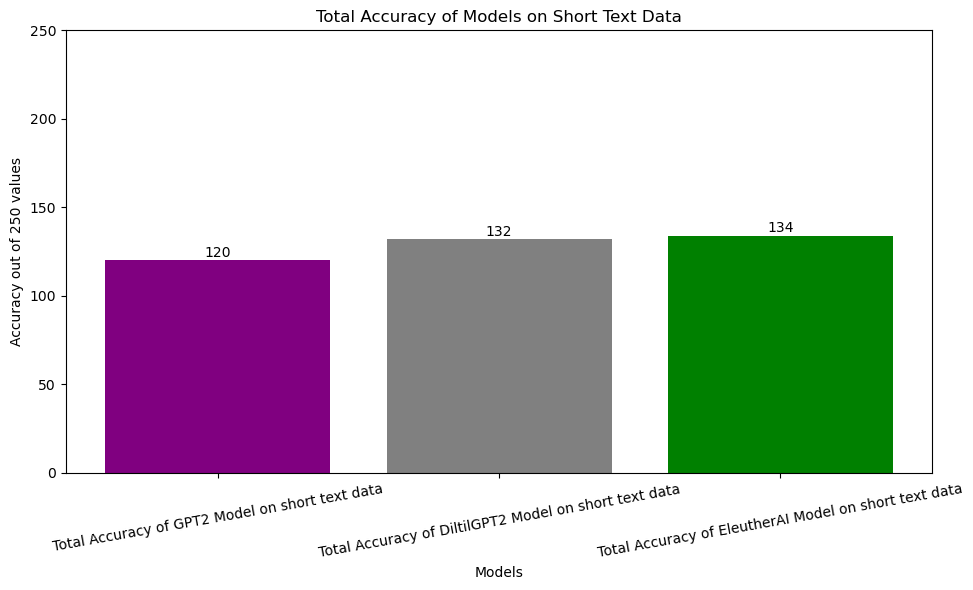

In [264]:
labels = list(total_accurate_stars_short.keys())
values = [value[0] for value in total_accurate_stars_short.values()]
#
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['purple', 'gray', 'green'])
plt.ylim(0, 250)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy out of 250 values')
plt.title('Total Accuracy of Models on Short Text Data')

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, yval, ha='center')

# Show the plot
plt.xticks(rotation=10)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


-----------------------------

MATCHING EQUAL VALUES AND COLLECTING IN DICTIONARIES FOR MEDIUM TEXT DATA

In [248]:
total_accurate_stars_medium = {"Total Accuracy of GPT2 Model on medium text data":[],
                        "Total Accuracy of DiltilGPT2 Model on medium text data":[],
                        "Total Accuracy of EleutherAI Model on medium text data":[]}

text_list_m = ["Total Accuracy of GPT2 Model on medium text data",
             "Total Accuracy of DiltilGPT2 Model on medium text data",
             "Total Accuracy of EleutherAI Model on medium text data"]
num = 0
for acc in medium_data_results:
    total = 0  
    for key, value in acc.items():
        total += len(value) 
    total_accurate_stars_medium[text_list_m[num]].append(total)  
    num += 1

# Print the total counts for each dictionary
print(total_accurate_stars_medium)

{'Total Accuracy of GPT2 Model on medium text data': [115], 'Total Accuracy of DiltilGPT2 Model on medium text data': [127], 'Total Accuracy of EleutherAI Model on medium text data': [129]}


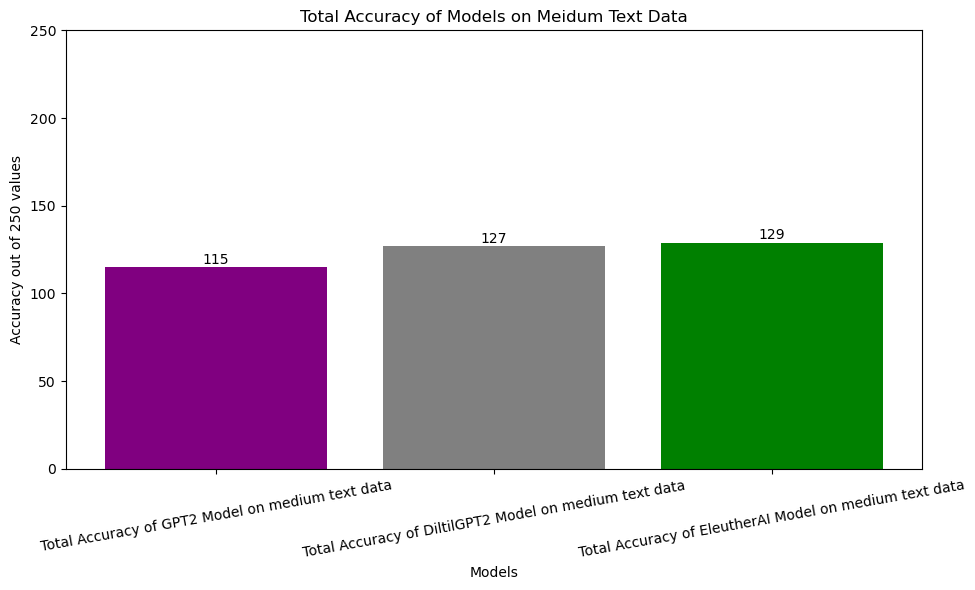

In [268]:
labels = list(total_accurate_stars_medium.keys())
values = [value[0] for value in total_accurate_stars_medium.values()]
#
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['purple', 'gray', 'green'])
plt.ylim(0, 250)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy out of 250 values')
plt.title('Total Accuracy of Models on Meidum Text Data')

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, yval, ha='center')

# Show the plot
plt.xticks(rotation=10)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

----------------------------

MATCHING EQUAL VALUES AND COLLECTING IN DICTIONARIES FOR LONG TEXT DATA

In [250]:
total_accurate_stars_long = {"Total Accuracy of GPT2 Model on long text data":[],
                        "Total Accuracy of DiltilGPT2 Model on long text data":[],
                        "Total Accuracy of EleutherAI Model on long text data":[]}

text_list_l = ["Total Accuracy of GPT2 Model on long text data",
             "Total Accuracy of DiltilGPT2 Model on long text data",
             "Total Accuracy of EleutherAI Model on long text data"]
num = 0
for acc in long_data_results:
    total = 0  
    for key, value in acc.items():
        total += len(value) 
    total_accurate_stars_long[text_list_l[num]].append(total)  
    num += 1

# Print the total counts for each dictionary
print(total_accurate_stars_long)

{'Total Accuracy of GPT2 Model on long text data': [129], 'Total Accuracy of DiltilGPT2 Model on long text data': [139], 'Total Accuracy of EleutherAI Model on long text data': [135]}


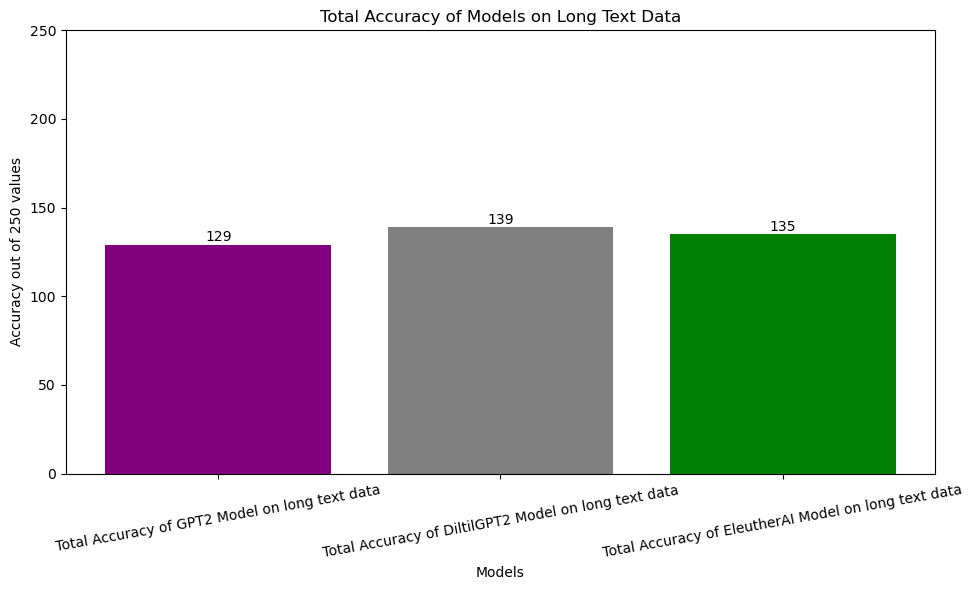

In [270]:
labels = list(total_accurate_stars_long.keys())
values = [value[0] for value in total_accurate_stars_long.values()]
#
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['purple', 'gray', 'green'])
plt.ylim(0, 250)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy out of 250 values')
plt.title('Total Accuracy of Models on Long Text Data')

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, yval, ha='center')

# Show the plot
plt.xticks(rotation=10)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

----------------------------

FUNCTION FOR GATHERING & COMPARISON OF UNEQUAL/UNMATCHED VALUES

In [ ]:
# For unmatched sentiment scores, define another function again including mostly dictionaries, "for" loops and conditional statements.

In [206]:
def Difference_scaling(dataF):
    diff_score_gpt2 = {"1":[],"2":[],"3":[],"4":[],"5":[]}
    diff_score_distil = {"1":[],"2":[],"3":[],"4":[],"5":[]}
    diff_score_Eleuther = {"1":[],"2":[],"3":[],"4":[],"5":[]}
    
    for a in range(len(dataF)):
        if dataF["score"].iloc[a] == 1 and dataF["star_gpt2"].iloc[a] != 1:
            diff_score_gpt2["1"].append(dataF["star_gpt2"].iloc[a])
        elif dataF["score"].iloc[a] == 2 and dataF["star_gpt2"].iloc[a] != 1:
            diff_score_gpt2["2"].append(dataF["star_gpt2"].iloc[a])
        elif dataF["score"].iloc[a] == 3 and dataF["star_gpt2"].iloc[a] != 3:
            diff_score_gpt2["3"].append(dataF["star_gpt2"].iloc[a])
        elif dataF["score"].iloc[a] == 4 and dataF["star_gpt2"].iloc[a] != 4:
            diff_score_gpt2["4"].append(dataF["star_gpt2"].iloc[a])
        elif dataF["score"].iloc[a] == 5 and dataF["star_gpt2"].iloc[a] != 5:
            diff_score_gpt2["5"].append(dataF["star_gpt2"].iloc[a])

    for m in range(len(dataF)):
        if dataF["score"].iloc[m] == 1 and dataF["star_distil"].iloc[m] != 1:
            diff_score_distil["1"].append(dataF["star_distil"].iloc[m])
        elif dataF["score"].iloc[m] == 2 and dataF["star_distil"].iloc[m] != 2:
            diff_score_distil["2"].append(dataF["star_distil"].iloc[m])
        elif dataF["score"].iloc[m] == 3 and dataF["star_distil"].iloc[m] != 3:
            diff_score_distil["3"].append(dataF["star_distil"].iloc[m])
        elif dataF["score"].iloc[m] == 4 and dataF["star_distil"].iloc[m] != 4:
            diff_score_distil["4"].append(dataF["star_distil"].iloc[m])
        elif dataF["score"].iloc[m] == 5 and dataF["star_distil"].iloc[m] != 5:
            diff_score_distil["5"].append(dataF["star_distil"].iloc[m])

    for n in range(len(dataF)):
        if dataF["score"].iloc[n] == 1 and dataF["star_Eleuther"].iloc[n] != 1:
            diff_score_Eleuther["1"].append(dataF["star_Eleuther"].iloc[n])
        elif dataF["score"].iloc[n] == 2 and dataF["star_Eleuther"].iloc[n] != 2:
            diff_score_Eleuther["2"].append(dataF["star_Eleuther"].iloc[n])
        elif dataF["score"].iloc[n] == 3 and dataF["star_Eleuther"].iloc[n] != 3:
            diff_score_Eleuther["3"].append(dataF["star_Eleuther"].iloc[n])
        elif dataF["score"].iloc[n] == 4 and dataF["star_Eleuther"].iloc[n] != 4:
            diff_score_Eleuther["4"].append(dataF["star_Eleuther"].iloc[n])
        elif dataF["score"].iloc[n] == 5 and dataF["star_Eleuther"].iloc[n] != 5:
            diff_score_Eleuther["5"].append(dataF["star_Eleuther"].iloc[n])

    return diff_score_gpt2, diff_score_distil, diff_score_Eleuther

-------------------------

SHORT DATA DIFFERENCE COMPARISON

In [222]:
short_data_diff_score = Difference_scaling(short_text_data)
print("Difference lists for the short text data:")
print(short_data_diff_score)

Difference lists for the short text data:
({'1': [3, 5, 2, 4, 4, 2, 5], '2': [2, 5, 3, 4, 4, 2], '3': [5, 5, 5, 4, 1], '4': [3, 5, 3, 5, 5, 3, 3, 2, 5, 2, 5, 2], '5': [4, 1, 3, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 1, 4, 2, 4, 1, 4, 4, 4, 2, 1, 4, 4, 4, 3, 1, 4, 2, 4, 2, 3, 2, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 1, 3, 4, 4, 4, 3, 4, 4, 4, 1, 4, 1, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 1, 4, 3, 3, 4, 2, 1, 4, 4, 4, 3, 4, 4, 1, 4, 4]}, {'1': [3, 5, 4, 2, 5, 5, 5], '2': [1, 4, 3, 5, 5], '3': [4, 5, 4, 4, 1], '4': [3, 5, 5, 5, 3, 3, 5, 5, 3, 1, 5, 1], '5': [4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 1, 4, 1, 4, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 2, 3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 2, 4, 4, 4, 4, 4, 3, 4, 1, 4, 4, 3, 4, 4, 4, 3, 4, 4, 2, 4, 4, 4, 3, 4, 4, 1, 4, 3, 4, 4, 3, 4, 4, 4, 2, 4, 4, 3, 4]}, {'1': [3, 5, 3, 2, 5, 3], '2': [1, 4, 5, 1, 1], '3': [4, 4, 5, 5, 4, 1], '4': [5, 1, 5, 5, 5, 3, 5, 3, 3, 3, 1, 5, 2], '5': [4, 4, 3,

In [282]:
mean_values_short = []
for d in short_data_diff_score:
    means = {key: np.mean(value) for key, value in d.items()}
    mean_values_short.append(means)

# Print the mean values
for idx, means in enumerate(mean_values_short):
    form_means = {key: f"{mean:.2f}" for key, mean in means.items()}
    print(f"Means for dictionary {idx + 1}: {form_means}")

Means for dictionary 1: {'1': '3.57', '2': '3.33', '3': '4.00', '4': '3.58', '5': '3.38'}
Means for dictionary 2: {'1': '4.14', '2': '3.60', '3': '3.60', '4': '3.67', '5': '3.48'}
Means for dictionary 3: {'1': '3.50', '2': '2.40', '3': '3.83', '4': '3.54', '5': '3.43'}


In [365]:
means_GPT2 = {'1': 3.57, '2': 3.33, '3': 4.00, '4': 3.58, '5': 3.38}
means_DiltilGPT2 = {'1': 4.14, '2': 3.60, '3': 3.60, '4': 3.67, '5': 3.48}
menas_Eleuther = {'1': 3.50, '2': 2.40, '3': 3.83, '4': 3.54, '5': 3.43}
data_short_evaluation = {
    'Key': list(map(float, means_GPT2.keys())),  # Convert keys to floats
    'GPT2': list(means_GPT2.values()),
    'DistilGPT2': list(means_DiltilGPT2.values()),
    'Eleuther_AI': list(menas_Eleuther.values())
}
short_eval_df = pd.DataFrame(data_short_evaluation)

# Step 2: Calculate differences from keys
short_eval_df['Diff_GPT2'] = short_eval_df['Key'] - short_eval_df['GPT2']
short_eval_df['Diff_DistilGPT2'] = short_eval_df['Key'] - short_eval_df['DistilGPT2']
short_eval_df['Diff_Eleuther_AI'] = short_eval_df['Key'] - short_eval_df['Eleuther_AI']

# Display the results
short_eval_df[['Key', 'GPT2', 'Diff_GPT2', 'DistilGPT2', 'Diff_DistilGPT2', 'Eleuther_AI', 'Diff_Eleuther_AI']]

,Key,GPT2,Diff_GPT2,DistilGPT2,Diff_DistilGPT2,Eleuther_AI,Diff_Eleuther_AI
0,1.0,3.57,-2.57,4.14,-3.14,3.50,-2.50
1,2.0,3.33,-1.33,3.60,-1.60,2.40,-0.40
2,3.0,4.00,-1.00,3.60,-0.60,3.83,-0.83
3,4.0,3.58,0.42,3.67,0.33,3.54,0.46
4,5.0,3.38,1.62,3.48,1.52,3.43,1.57


In [373]:
def sum_diff(dataF):
    GPT2_score = format(sum(abs(dataF["Diff_GPT2"])), ".2f")
    DistilGPT2_score = format(sum(abs(dataF["Diff_DistilGPT2"])),".2f")
    Diff_Eleuther_AI_score = format(sum(abs(dataF["Diff_Eleuther_AI"])), ".2f")
    score_list = [GPT2_score, DistilGPT2_score, Diff_Eleuther_AI_score]
    return score_list

In [375]:
sum_diff(short_eval_df)

['6.94', '7.19', '5.76']

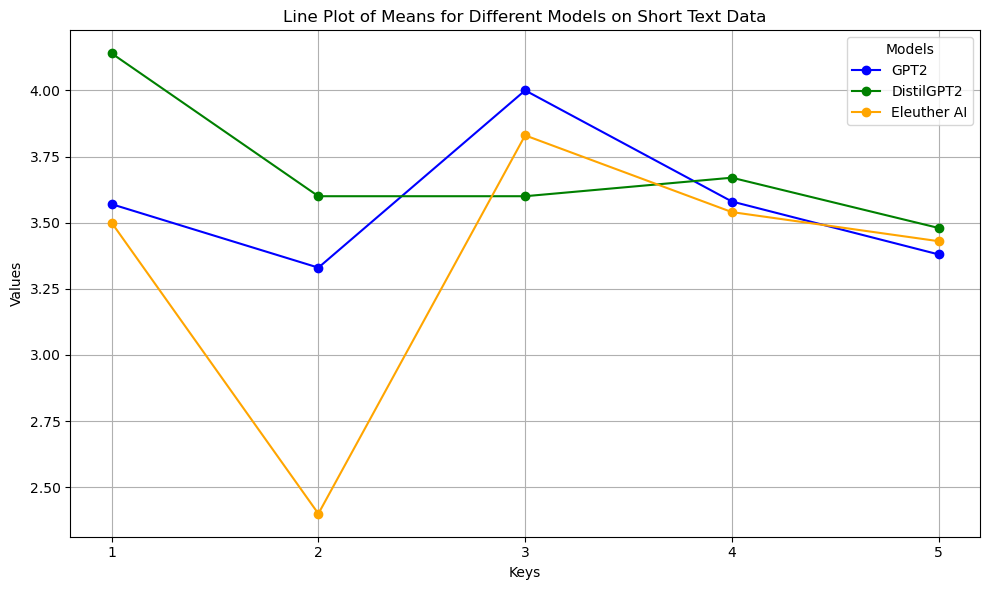

In [541]:
# Data
means_GPT2 = {'1': 3.57, '2': 3.33, '3': 4.00, '4': 3.58, '5': 3.38}
means_DistilGPT2 = {'1': 4.14, '2': 3.60, '3': 3.60, '4': 3.67, '5': 3.48}
means_Eleuther = {'1': 3.50, '2': 2.40, '3': 3.83, '4': 3.54, '5': 3.43}

# Prepare the data for plotting
x_values = list(means_GPT2.keys())  # Use the keys as x values
y_values_GPT2 = list(means_GPT2.values())  # y values for GPT2
y_values_DistilGPT2 = list(means_DistilGPT2.values())  # y values for DistilGPT2
y_values_Eleuther = list(means_Eleuther.values())  # y values for Eleuther

# Create the line plot
plt.figure(figsize=(10, 6))

plt.plot(x_values, y_values_GPT2, marker='o', label='GPT2', color='blue')
plt.plot(x_values, y_values_DistilGPT2, marker='o', label='DistilGPT2', color='green')
plt.plot(x_values, y_values_Eleuther, marker='o', label='Eleuther AI', color='orange')

# Adding titles and labels
plt.title('Line Plot of Means for Different Models on Short Text Data')
plt.xlabel('Keys')
plt.ylabel('Values')
plt.xticks(x_values)  # Set x-ticks to the keys
plt.legend(title='Models')
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

* Key Findings: In the short data, Eleuther AI model has the smallest difference score with 5.76 regaring sentiment analysis, being the most suitable model in terms of error rates.

-------------------------------------

MEDIUM DATA DIFFERENCE COMPARISON

In [224]:
medium_data_diff_score = Difference_scaling(medium_text_data)
print("Difference lists for the medium text data:")
print(medium_data_diff_score)

Difference lists for the medium text data:
({'1': [4, 4, 4, 2, 2, 3, 2, 3, 2], '2': [3, 4, 4, 2], '3': [2, 1, 2, 2, 5, 4, 5, 4, 2, 4, 4, 4], '4': [3, 2, 2, 3, 2, 3, 5, 3, 2, 1, 5, 2, 5, 5, 5], '5': [4, 4, 4, 4, 4, 2, 4, 3, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 1, 4, 1, 4, 4, 4, 3, 4, 4, 3, 2, 3, 4, 4, 4, 4, 1, 4, 4, 3, 4, 4, 4, 4, 1, 4, 4, 4, 4, 2, 3, 4, 4, 4, 4, 4]}, {'1': [2, 5, 2, 2, 4, 2, 3], '2': [1, 5, 1, 3, 1], '3': [4, 2, 1, 5, 4, 4, 4, 4, 4, 4], '4': [3, 2, 5, 3, 5, 2, 3, 5, 5, 3, 1, 1, 5, 5], '5': [2, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 2, 2, 4, 4, 4, 3, 4, 3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 3, 4]}, {'1': [3, 5, 5, 2, 2, 4, 2], '2': [5, 1, 1, 1], '3': [4, 1, 1, 5, 5, 5, 4, 4, 4, 4], '4': [1, 1, 5, 2, 3, 5,

In [306]:
mean_values_medium = []
for d in medium_data_diff_score:
    means = {key: np.mean(value) for key, value in d.items()}
    mean_values_medium.append(means)

# Print the mean values
for idx, means in enumerate(mean_values_medium):
    form_means = {key: f"{mean:.2f}" for key, mean in means.items()}
    print(f"Means for dictionary {idx + 1}: {form_means}")

Means for dictionary 1: {'1': '2.89', '2': '3.25', '3': '3.25', '4': '3.20', '5': '3.63'}
Means for dictionary 2: {'1': '2.86', '2': '2.20', '3': '3.60', '4': '3.43', '5': '3.66'}
Means for dictionary 3: {'1': '3.29', '2': '2.00', '3': '3.70', '4': '3.31', '5': '3.61'}


In [369]:
means_GPT2 = {'1': 2.89, '2': 3.25, '3': 3.25, '4': 3.20, '5': 3.63} # Means for dictionary 1
means_DiltilGPT2 = {'1': 2.86, '2': 2.20, '3': 3.60, '4': 3.43, '5': 3.66} # Means for dictionary 2
menas_Eleuther = {'1': 3.29, '2': 2.00, '3': 3.70, '4': 3.31, '5': 3.61} # Means for dictionary 3

data_medium_evaluation = {
    'Key': list(map(float, means_GPT2.keys())),  # Convert keys to floats
    'GPT2': list(means_GPT2.values()),
    'DistilGPT2': list(means_DiltilGPT2.values()),
    'Eleuther_AI': list(menas_Eleuther.values())
}
medium_eval_df = pd.DataFrame(data_medium_evaluation)

# Step 2: Calculate differences from keys
medium_eval_df['Diff_GPT2'] = medium_eval_df['Key'] - medium_eval_df['GPT2']
medium_eval_df['Diff_DistilGPT2'] = medium_eval_df['Key'] - medium_eval_df['DistilGPT2']
medium_eval_df['Diff_Eleuther_AI'] = medium_eval_df['Key'] - medium_eval_df['Eleuther_AI']

# Display the results
medium_eval_df[['Key', 'GPT2', 'Diff_GPT2', 'DistilGPT2', 'Diff_DistilGPT2', 'Eleuther_AI', 'Diff_Eleuther_AI']]

,Key,GPT2,Diff_GPT2,DistilGPT2,Diff_DistilGPT2,Eleuther_AI,Diff_Eleuther_AI
0,1.0,2.89,-1.89,2.86,-1.86,3.29,-2.29
1,2.0,3.25,-1.25,2.20,-0.20,2.00,0.00
2,3.0,3.25,-0.25,3.60,-0.60,3.70,-0.70
3,4.0,3.20,0.80,3.43,0.57,3.31,0.69
4,5.0,3.63,1.37,3.66,1.34,3.61,1.39


In [377]:
sum_diff(medium_eval_df)

['5.56', '4.57', '5.07']

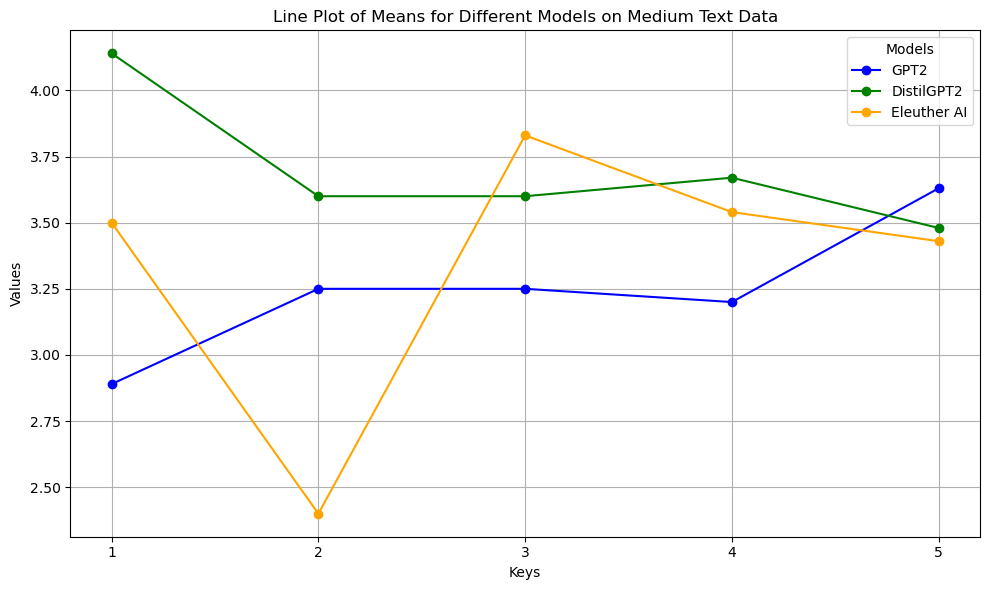

In [537]:
# Data
means_GPT2 = {'1': 2.89, '2': 3.25, '3': 3.25, '4': 3.20, '5': 3.63}
means_DiltilGPT2 = {'1': 2.86, '2': 2.20, '3': 3.60, '4': 3.43, '5': 3.66}
menas_Eleuther = {'1': 3.29, '2': 2.00, '3': 3.70, '4': 3.31, '5': 3.61}

# Prepare the data for plotting
x_values = list(means_GPT2.keys())  # Use the keys as x values
y_values_GPT2 = list(means_GPT2.values())  # y values for GPT2
y_values_DistilGPT2 = list(means_DistilGPT2.values())  # y values for DistilGPT2
y_values_Eleuther = list(means_Eleuther.values())  # y values for Eleuther

# Create the line plot
plt.figure(figsize=(10, 6))

plt.plot(x_values, y_values_GPT2, marker='o', label='GPT2', color='blue')
plt.plot(x_values, y_values_DistilGPT2, marker='o', label='DistilGPT2', color='green')
plt.plot(x_values, y_values_Eleuther, marker='o', label='Eleuther AI', color='orange')

# Adding titles and labels
plt.title('Line Plot of Means for Different Models on Medium Text Data')
plt.xlabel('Keys')
plt.ylabel('Values')
plt.xticks(x_values)  # Set x-ticks to the keys
plt.legend(title='Models')
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

* Key Findings: In the medium data, DistilGPT2 model has the smallest difference score with 4.57, it is more succesfull than the others in terms of small error rates.

-------------------------------------------------------

LONG DATA DIFFERENCE COMPARISON

In [226]:
long_data_diff_score = Difference_scaling(long_text_data)
print("Difference lists for the long text data:")
print(long_data_diff_score)

Difference lists for the long text data:
({'1': [2, 3, 5, 3, 4, 3], '2': [3, 3, 2], '3': [4, 1, 4, 4, 4, 2, 5, 1, 4, 2, 5, 5, 4], '4': [2, 3, 5, 3, 3, 5, 5, 5, 2, 3, 3], '5': [4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 1, 4, 1, 4, 4, 4, 3, 3, 4, 4, 1, 4, 4, 4, 4, 1, 2, 2, 4, 4, 4, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 1, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 4, 2, 4, 3, 4, 4, 4, 1, 4, 4, 4, 4, 3, 1, 2, 4, 4, 4, 3, 4, 4, 1, 3, 4]}, {'1': [2, 3, 5, 4], '2': [3, 1, 1], '3': [4, 5, 5, 4, 2, 4, 1, 4, 5, 5, 4], '4': [3, 5, 5, 3, 3, 5, 5, 3, 5, 3, 5, 5, 3, 3, 3], '5': [3, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 4, 4, 2, 4, 4, 4, 1, 4, 4, 4, 1, 1, 4, 2, 4, 4, 4, 4, 4, 3, 3, 4, 3, 4, 4, 3, 4, 3, 2, 3, 4, 4, 4, 4, 1, 4, 4, 2, 1, 4, 4, 2, 4, 2, 3, 4, 3, 4, 1, 4, 4, 1, 4, 4, 4, 4, 3, 4, 4, 4, 1, 3, 4]}, {'1': [3, 5, 4, 2], '2': [4, 5], '3': [5, 5, 4, 4, 2, 4, 1, 4, 5, 5, 4], '4': [5, 5, 1, 5, 3, 5, 5, 1, 3, 1, 3, 3], '5': [4, 1, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 1, 4, 1, 4, 4, 3, 3, 4, 4, 

In [308]:
mean_values_long = []
for d in long_data_diff_score:
    means = {key: np.mean(value) for key, value in d.items()}
    mean_values_long.append(means)

# Print the mean values
for idx, means in enumerate(mean_values_long):
    form_means = {key: f"{mean:.2f}" for key, mean in means.items()}
    print(f"Means for dictionary {idx + 1}: {form_means}")

Means for dictionary 1: {'1': '3.33', '2': '2.67', '3': '3.46', '4': '3.55', '5': '3.44'}
Means for dictionary 2: {'1': '3.50', '2': '1.67', '3': '3.91', '4': '3.93', '5': '3.28'}
Means for dictionary 3: {'1': '3.50', '2': '4.50', '3': '3.91', '4': '3.33', '5': '3.45'}


In [379]:
means_GPT2 = {'1': 3.33, '2': 2.67, '3': 3.46, '4': 3.55, '5': 3.44} # Means for dictionary 1
means_DiltilGPT2 = {'1': 3.50, '2': 1.67, '3': 3.91, '4': 3.93, '5': 3.28} # Means for dictionary 2
menas_Eleuther = {'1': 3.50, '2': 4.50, '3': 3.91, '4': 3.33, '5': 3.45} # Means for dictionary 3

data_long_evaluation = {
    'Key': list(map(float, means_GPT2.keys())),  # Convert keys to floats
    'GPT2': list(means_GPT2.values()),
    'DistilGPT2': list(means_DiltilGPT2.values()),
    'Eleuther_AI': list(menas_Eleuther.values())
}
long_eval_df = pd.DataFrame(data_long_evaluation)

# Step 2: Calculate differences from keys
long_eval_df['Diff_GPT2'] = long_eval_df['Key'] - long_eval_df['GPT2']
long_eval_df['Diff_DistilGPT2'] = long_eval_df['Key'] - long_eval_df['DistilGPT2']
long_eval_df['Diff_Eleuther_AI'] = long_eval_df['Key'] - long_eval_df['Eleuther_AI']

# Display the results
long_eval_df[['Key', 'GPT2', 'Diff_GPT2', 'DistilGPT2', 'Diff_DistilGPT2', 'Eleuther_AI', 'Diff_Eleuther_AI']]

,Key,GPT2,Diff_GPT2,DistilGPT2,Diff_DistilGPT2,Eleuther_AI,Diff_Eleuther_AI
0,1.0,3.33,-2.33,3.50,-2.50,3.50,-2.50
1,2.0,2.67,-0.67,1.67,0.33,4.50,-2.50
2,3.0,3.46,-0.46,3.91,-0.91,3.91,-0.91
3,4.0,3.55,0.45,3.93,0.07,3.33,0.67
4,5.0,3.44,1.56,3.28,1.72,3.45,1.55


In [381]:
sum_diff(long_eval_df)

['5.47', '5.53', '8.13']

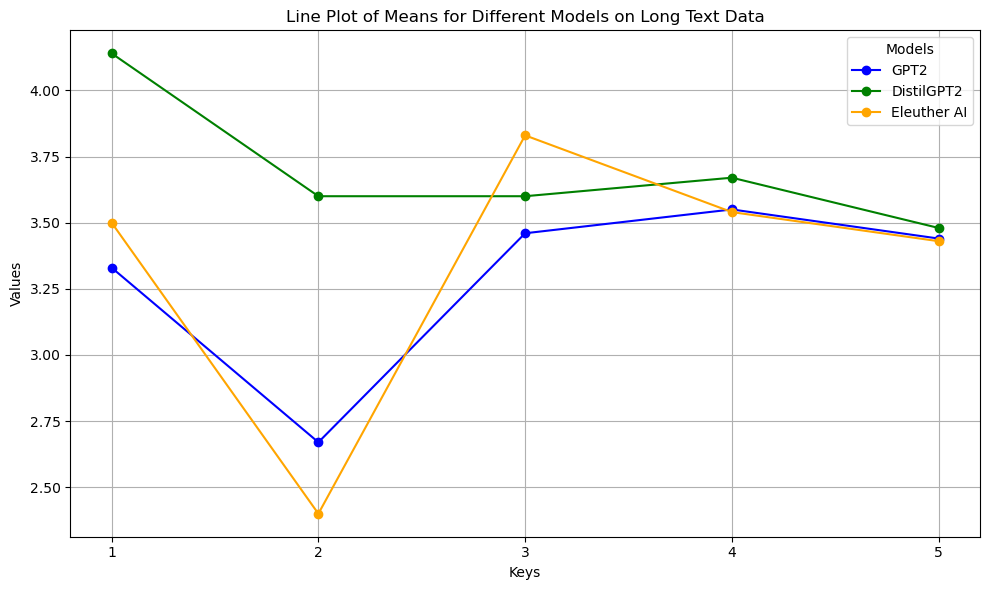

In [539]:
means_GPT2 = {'1': 3.33, '2': 2.67, '3': 3.46, '4': 3.55, '5': 3.44}
means_DiltilGPT2 = {'1': 3.50, '2': 1.67, '3': 3.91, '4': 3.93, '5': 3.28}
menas_Eleuther = {'1': 3.50, '2': 4.50, '3': 3.91, '4': 3.33, '5': 3.45}

# Prepare the data for plotting
x_values = list(means_GPT2.keys())  # Use the keys as x values
y_values_GPT2 = list(means_GPT2.values())  # y values for GPT2
y_values_DistilGPT2 = list(means_DistilGPT2.values())  # y values for DistilGPT2
y_values_Eleuther = list(means_Eleuther.values())  # y values for Eleuther

# Create the line plot
plt.figure(figsize=(10, 6))

plt.plot(x_values, y_values_GPT2, marker='o', label='GPT2', color='blue')
plt.plot(x_values, y_values_DistilGPT2, marker='o', label='DistilGPT2', color='green')
plt.plot(x_values, y_values_Eleuther, marker='o', label='Eleuther AI', color='orange')

# Adding titles and labels
plt.title('Line Plot of Means for Different Models on Long Text Data')
plt.xlabel('Keys')
plt.ylabel('Values')
plt.xticks(x_values)  # Set x-ticks to the keys
plt.legend(title='Models')
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

* Key Findings: In the long data, GPT2 and DistilGPT2 models have smaller difference scores regarding sentiment analysis, GPT2 model having the smallest error rate with 5.47 score. 


In [561]:
long_text_data['star_gpt2'] = long_text_data['star_gpt2'].astype(int)
long_text_data['star_distil'] = long_text_data['star_distil'].astype(int)
long_text_data['star_Eleuther'] = long_text_data['star_Eleuther'].astype(int)

long_text_data.describe()

,score,star_gpt2,star_distil,star_Eleuther
count,250.000000,250.000000,250.000000,250.000000
mean,4.560000,4.076000,4.096000,4.096000
std,0.993149,1.150443,1.221784,1.185075
min,1.000000,1.000000,1.000000,1.000000
25%,5.000000,4.000000,4.000000,4.000000
50%,5.000000,4.000000,5.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000


------------------

* Now, for zero-shot classification, used "pipeline" from transformers. Defined candidate labels for classification, and a simple function.

In [417]:
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Candidate labels (topics)
candidate_labels = [
    "User Experience",
    "Response Quality",
    "Accuracy of Information",
    "Creativity in Responses",
    "Ease of Use",
    "Helpfulness",
    "Engagement Level",
    "Technical Problem",
    "Availability",
    "Education and Learning"
]

# Function to classify and get the most relevant class
def classify_review(review):
    result = classifier(review, candidate_labels)
    return result['labels'][0]  # The first label is the most relevant one

# Apply the function to create a new column
short_text_data['most_relevant_class'] = short_text_data['content'].apply(classify_review)

# Display the updated DataFrame
short_text_data

,content,score,Generated_text_gpt2,star_gpt2,Generated_text_distil,star_distil,Generated_text_Eleuther,star_Eleuther,most_relevant_class
54555,very yuseful app very good app,5,very yuseful app very good app great user inte...,5,very yuseful app very good app for beginners w...,5,very yuseful app very good app.\n\nI have a qu...,5,Ease of Use
54589,This is incredible for us,5,"This is incredible for us,"" said Hennepin Coun...",5,This is incredible for us. And this is why it'...,5,This is incredible for us to see the new and i...,5,Helpfulness
54602,very good app and helpful,5,very good app and helpful. This is a good star...,4,"very good app and helpful for many tasks, but ...",4,very good app and helpful.\n\nI have a few que...,4,Helpfulness
54611,Superb I had really love it,5,Superb I had really love it. I've never found ...,5,Superb I had really love it with the way it wo...,5,Superb I had really love it. I was a little bi...,5,Response Quality
54632,this goood very very good,5,this goood very very good\n\nIf you do not hav...,1,"this goood very very good""\n\n\n\n\n\n\n\n\n\n...",5,this goood very very good.\n\nI have a questio...,4,Helpfulness
...,...,...,...,...,...,...,...,...,...
59867,I can cheat on test now thanks,5,"I can cheat on test now thanks!"" She replied, ...",1,I can cheat on test now thanks to the new tool...,3,I can cheat on test now thanks to the new vers...,5,Helpfulness
59876,Am really really appreciate it,5,"Am really really appreciate it, it was a lot o...",4,Am really really appreciate it. I don't rememb...,5,Am really really appreciate it. I'm not sure i...,5,Helpfulness
59881,it's very high and intelligent,5,"it's very high and intelligent,"" a person fami...",4,"it's very high and intelligent, and therefore ...",4,it's very high and intelligent.\n\nI'm not sur...,4,Creativity in Responses
59917,"excellent app, and very useful",5,"excellent app, and very useful - if you want t...",5,"excellent app, and very useful to your Android...",5,"excellent app, and very useful for the first t...",5,Ease of Use


In [435]:
short_text_data['Generated_text_gpt2'].apply(classify_review) # 17 minutes run time

54555                Ease of Use
54589           Engagement Level
54602                Helpfulness
54611               Availability
54632                Helpfulness
                  ...           
59867                Ease of Use
59876    Accuracy of Information
59881           Engagement Level
59917                Ease of Use
59947    Accuracy of Information
Name: Generated_text_gpt2, Length: 250, dtype: object

In [436]:
short_text_data

,content,score,Generated_text_gpt2,star_gpt2,Generated_text_distil,star_distil,Generated_text_Eleuther,star_Eleuther,most_relevant_class,most_relevant_class_gpt2
54555,very yuseful app very good app,5,very yuseful app very good app great user inte...,5,very yuseful app very good app for beginners w...,5,very yuseful app very good app.\n\nI have a qu...,5,Ease of Use,Ease of Use
54589,This is incredible for us,5,"This is incredible for us,"" said Hennepin Coun...",5,This is incredible for us. And this is why it'...,5,This is incredible for us to see the new and i...,5,Helpfulness,Engagement Level
54602,very good app and helpful,5,very good app and helpful. This is a good star...,4,"very good app and helpful for many tasks, but ...",4,very good app and helpful.\n\nI have a few que...,4,Helpfulness,Helpfulness
54611,Superb I had really love it,5,Superb I had really love it. I've never found ...,5,Superb I had really love it with the way it wo...,5,Superb I had really love it. I was a little bi...,5,Response Quality,Availability
54632,this goood very very good,5,this goood very very good\n\nIf you do not hav...,1,"this goood very very good""\n\n\n\n\n\n\n\n\n\n...",5,this goood very very good.\n\nI have a questio...,4,Helpfulness,Helpfulness
...,...,...,...,...,...,...,...,...,...,...
59867,I can cheat on test now thanks,5,"I can cheat on test now thanks!"" She replied, ...",1,I can cheat on test now thanks to the new tool...,3,I can cheat on test now thanks to the new vers...,5,Helpfulness,Ease of Use
59876,Am really really appreciate it,5,"Am really really appreciate it, it was a lot o...",4,Am really really appreciate it. I don't rememb...,5,Am really really appreciate it. I'm not sure i...,5,Helpfulness,Accuracy of Information
59881,it's very high and intelligent,5,"it's very high and intelligent,"" a person fami...",4,"it's very high and intelligent, and therefore ...",4,it's very high and intelligent.\n\nI'm not sur...,4,Creativity in Responses,Engagement Level
59917,"excellent app, and very useful",5,"excellent app, and very useful - if you want t...",5,"excellent app, and very useful to your Android...",5,"excellent app, and very useful for the first t...",5,Ease of Use,Ease of Use


In [439]:
short_text_data['most_relevant_class_distil'] = short_text_data['Generated_text_distil'].apply(classify_review)

In [440]:
short_text_data.head()

,content,score,Generated_text_gpt2,star_gpt2,Generated_text_distil,star_distil,Generated_text_Eleuther,star_Eleuther,most_relevant_class,most_relevant_class_gpt2,most_relevant_class_distil
54555,very yuseful app very good app,5,very yuseful app very good app great user inte...,5,very yuseful app very good app for beginners w...,5,very yuseful app very good app.\n\nI have a qu...,5,Ease of Use,Ease of Use,Accuracy of Information
54589,This is incredible for us,5,"This is incredible for us,"" said Hennepin Coun...",5,This is incredible for us. And this is why it'...,5,This is incredible for us to see the new and i...,5,Helpfulness,Engagement Level,Ease of Use
54602,very good app and helpful,5,very good app and helpful. This is a good star...,4,"very good app and helpful for many tasks, but ...",4,very good app and helpful.\n\nI have a few que...,4,Helpfulness,Helpfulness,Helpfulness
54611,Superb I had really love it,5,Superb I had really love it. I've never found ...,5,Superb I had really love it with the way it wo...,5,Superb I had really love it. I was a little bi...,5,Response Quality,Availability,Ease of Use
54632,this goood very very good,5,this goood very very good\n\nIf you do not hav...,1,"this goood very very good""\n\n\n\n\n\n\n\n\n\n...",5,this goood very very good.\n\nI have a questio...,4,Helpfulness,Helpfulness,Response Quality


In [443]:
short_text_data['most_relevant_class_Eleuther'] = short_text_data['Generated_text_Eleuther'].apply(classify_review)

In [444]:
short_text_data.head()

,content,score,Generated_text_gpt2,star_gpt2,Generated_text_distil,star_distil,Generated_text_Eleuther,star_Eleuther,most_relevant_class,most_relevant_class_gpt2,most_relevant_class_distil,most_relevant_class_Eleuther
54555,very yuseful app very good app,5,very yuseful app very good app great user inte...,5,very yuseful app very good app for beginners w...,5,very yuseful app very good app.\n\nI have a qu...,5,Ease of Use,Ease of Use,Accuracy of Information,Availability
54589,This is incredible for us,5,"This is incredible for us,"" said Hennepin Coun...",5,This is incredible for us. And this is why it'...,5,This is incredible for us to see the new and i...,5,Helpfulness,Engagement Level,Ease of Use,Response Quality
54602,very good app and helpful,5,very good app and helpful. This is a good star...,4,"very good app and helpful for many tasks, but ...",4,very good app and helpful.\n\nI have a few que...,4,Helpfulness,Helpfulness,Helpfulness,Helpfulness
54611,Superb I had really love it,5,Superb I had really love it. I've never found ...,5,Superb I had really love it with the way it wo...,5,Superb I had really love it. I was a little bi...,5,Response Quality,Availability,Ease of Use,Response Quality
54632,this goood very very good,5,this goood very very good\n\nIf you do not hav...,1,"this goood very very good""\n\n\n\n\n\n\n\n\n\n...",5,this goood very very good.\n\nI have a questio...,4,Helpfulness,Helpfulness,Response Quality,Response Quality


In [447]:
short_text_data.to_csv('short_text_data_with_Zero_Shot', index=False)

In [449]:
medium_text_data['most_relevant_class'] = medium_text_data['content'].apply(classify_review)

In [450]:
medium_text_data.head()

,content,score,Generated_text_gpt2,star_gpt2,Generated_text_distil,star_distil,Generated_text_Eleuther,star_Eleuther,most_relevant_class
56282,I think it is good for learning,5,I think it is good for learning in the languag...,4,"I think it is good for learning, but not of an...",2,I think it is good for learning about the worl...,4,Education and Learning
56294,I need a quick response please,1,I need a quick response please.\n\nThe issue a...,4,I need a quick response please. When a custome...,1,I need a quick response please.\n\nI have a qu...,3,Response Quality
56308,"It's really beneficial, I love it",5,"It's really beneficial, I love it!"" - Tom.\n\n...",5,"It's really beneficial, I love it.""\n\n\n\n\n\...",5,"It's really beneficial, I love it. I'm not sur...",5,Helpfulness
56325,it is very good for scientific chat,5,it is very good for scientific chat.\n\n\nAnd ...,4,it is very good for scientific chat and I love...,4,it is very good for scientific chat.\n\nI have...,4,Response Quality
56342,Very intelligent and satisfying AI,5,Very intelligent and satisfying AI for players...,4,"Very intelligent and satisfying AI."" ""What mak...",4,Very intelligent and satisfying AI.\n\nI’m not...,5,Creativity in Responses


In [457]:
medium_text_data['most_relevant_class_gpt2'] = medium_text_data['Generated_text_gpt2'].apply(classify_review)

In [458]:
medium_text_data.head()

,content,score,Generated_text_gpt2,star_gpt2,Generated_text_distil,star_distil,Generated_text_Eleuther,star_Eleuther,most_relevant_class,most_relevant_class_gpt2
56282,I think it is good for learning,5,I think it is good for learning in the languag...,4,"I think it is good for learning, but not of an...",2,I think it is good for learning about the worl...,4,Education and Learning,Accuracy of Information
56294,I need a quick response please,1,I need a quick response please.\n\nThe issue a...,4,I need a quick response please. When a custome...,1,I need a quick response please.\n\nI have a qu...,3,Response Quality,Response Quality
56308,"It's really beneficial, I love it",5,"It's really beneficial, I love it!"" - Tom.\n\n...",5,"It's really beneficial, I love it.""\n\n\n\n\n\...",5,"It's really beneficial, I love it. I'm not sur...",5,Helpfulness,Helpfulness
56325,it is very good for scientific chat,5,it is very good for scientific chat.\n\n\nAnd ...,4,it is very good for scientific chat and I love...,4,it is very good for scientific chat.\n\nI have...,4,Response Quality,Ease of Use
56342,Very intelligent and satisfying AI,5,Very intelligent and satisfying AI for players...,4,"Very intelligent and satisfying AI."" ""What mak...",4,Very intelligent and satisfying AI.\n\nI’m not...,5,Creativity in Responses,Ease of Use


In [461]:
medium_text_data['most_relevant_class_distil'] = medium_text_data['Generated_text_distil'].apply(classify_review)

In [462]:
medium_text_data.head()

,content,score,Generated_text_gpt2,star_gpt2,Generated_text_distil,star_distil,Generated_text_Eleuther,star_Eleuther,most_relevant_class,most_relevant_class_gpt2,most_relevant_class_distil
56282,I think it is good for learning,5,I think it is good for learning in the languag...,4,"I think it is good for learning, but not of an...",2,I think it is good for learning about the worl...,4,Education and Learning,Accuracy of Information,Accuracy of Information
56294,I need a quick response please,1,I need a quick response please.\n\nThe issue a...,4,I need a quick response please. When a custome...,1,I need a quick response please.\n\nI have a qu...,3,Response Quality,Response Quality,Accuracy of Information
56308,"It's really beneficial, I love it",5,"It's really beneficial, I love it!"" - Tom.\n\n...",5,"It's really beneficial, I love it.""\n\n\n\n\n\...",5,"It's really beneficial, I love it. I'm not sur...",5,Helpfulness,Helpfulness,Helpfulness
56325,it is very good for scientific chat,5,it is very good for scientific chat.\n\n\nAnd ...,4,it is very good for scientific chat and I love...,4,it is very good for scientific chat.\n\nI have...,4,Response Quality,Ease of Use,Technical Problem
56342,Very intelligent and satisfying AI,5,Very intelligent and satisfying AI for players...,4,"Very intelligent and satisfying AI."" ""What mak...",4,Very intelligent and satisfying AI.\n\nI’m not...,5,Creativity in Responses,Ease of Use,Creativity in Responses


In [465]:
medium_text_data['most_relevant_class_Eleuther'] = medium_text_data['Generated_text_Eleuther'].apply(classify_review)

In [466]:
medium_text_data.head()

,content,score,Generated_text_gpt2,star_gpt2,Generated_text_distil,star_distil,Generated_text_Eleuther,star_Eleuther,most_relevant_class,most_relevant_class_gpt2,most_relevant_class_distil,most_relevant_class_Eleuther
56282,I think it is good for learning,5,I think it is good for learning in the languag...,4,"I think it is good for learning, but not of an...",2,I think it is good for learning about the worl...,4,Education and Learning,Accuracy of Information,Accuracy of Information,Availability
56294,I need a quick response please,1,I need a quick response please.\n\nThe issue a...,4,I need a quick response please. When a custome...,1,I need a quick response please.\n\nI have a qu...,3,Response Quality,Response Quality,Accuracy of Information,Technical Problem
56308,"It's really beneficial, I love it",5,"It's really beneficial, I love it!"" - Tom.\n\n...",5,"It's really beneficial, I love it.""\n\n\n\n\n\...",5,"It's really beneficial, I love it. I'm not sur...",5,Helpfulness,Helpfulness,Helpfulness,Helpfulness
56325,it is very good for scientific chat,5,it is very good for scientific chat.\n\n\nAnd ...,4,it is very good for scientific chat and I love...,4,it is very good for scientific chat.\n\nI have...,4,Response Quality,Ease of Use,Technical Problem,Ease of Use
56342,Very intelligent and satisfying AI,5,Very intelligent and satisfying AI for players...,4,"Very intelligent and satisfying AI."" ""What mak...",4,Very intelligent and satisfying AI.\n\nI’m not...,5,Creativity in Responses,Ease of Use,Creativity in Responses,Availability


In [469]:
medium_text_data.to_csv('medium_text_data_with_Zero_Shot', index=False)

In [471]:
long_text_data['most_relevant_class'] = long_text_data['content'].apply(classify_review)

In [472]:
long_text_data.head()

,content,score,Generated_text_gpt2,star_gpt2,Generated_text_distil,star_distil,Generated_text_Eleuther,star_Eleuther,most_relevant_class
53533,"very good app , accurate answers and much more",5,"very good app , accurate answers and much more...",4,"very good app , accurate answers and much more...",5,"very good app , accurate answers and much more...",5,Accuracy of Information
53626,It is very helpful app for every information.,5,It is very helpful app for every information. ...,5,It is very helpful app for every information. ...,3,It is very helpful app for every information.\...,4,Helpfulness
53633,very good very good very good very good very good,5,very good very good very good very good very g...,4,very good very good very good very good very g...,5,very good very good very good very good very g...,5,Creativity in Responses
53639,There seems to be a cap on detailed responses,5,There seems to be a cap on detailed responses ...,3,There seems to be a cap on detailed responses ...,2,There seems to be a cap on detailed responses ...,1,Response Quality
53645,it's so cool and it helps me on assignments,5,it's so cool and it helps me on assignments wh...,4,it's so cool and it helps me on assignments. T...,4,it's so cool and it helps me on assignments. I...,4,Helpfulness


In [480]:
long_text_data['most_relevant_class_gpt2'] = long_text_data['Generated_text_gpt2'].apply(classify_review)

In [481]:
long_text_data.head()

,content,score,Generated_text_gpt2,star_gpt2,Generated_text_distil,star_distil,Generated_text_Eleuther,star_Eleuther,most_relevant_class,most_relevant_class_gpt2
53533,"very good app , accurate answers and much more",5,"very good app , accurate answers and much more...",4,"very good app , accurate answers and much more...",5,"very good app , accurate answers and much more...",5,Accuracy of Information,Accuracy of Information
53626,It is very helpful app for every information.,5,It is very helpful app for every information. ...,5,It is very helpful app for every information. ...,3,It is very helpful app for every information.\...,4,Helpfulness,Ease of Use
53633,very good very good very good very good very good,5,very good very good very good very good very g...,4,very good very good very good very good very g...,5,very good very good very good very good very g...,5,Creativity in Responses,Response Quality
53639,There seems to be a cap on detailed responses,5,There seems to be a cap on detailed responses ...,3,There seems to be a cap on detailed responses ...,2,There seems to be a cap on detailed responses ...,1,Response Quality,Accuracy of Information
53645,it's so cool and it helps me on assignments,5,it's so cool and it helps me on assignments wh...,4,it's so cool and it helps me on assignments. T...,4,it's so cool and it helps me on assignments. I...,4,Helpfulness,Engagement Level


In [484]:
long_text_data['most_relevant_class_distil'] = long_text_data['Generated_text_distil'].apply(classify_review)

In [485]:
long_text_data.head()

,content,score,Generated_text_gpt2,star_gpt2,Generated_text_distil,star_distil,Generated_text_Eleuther,star_Eleuther,most_relevant_class,most_relevant_class_gpt2,most_relevant_class_distil
53533,"very good app , accurate answers and much more",5,"very good app , accurate answers and much more...",4,"very good app , accurate answers and much more...",5,"very good app , accurate answers and much more...",5,Accuracy of Information,Accuracy of Information,Accuracy of Information
53626,It is very helpful app for every information.,5,It is very helpful app for every information. ...,5,It is very helpful app for every information. ...,3,It is very helpful app for every information.\...,4,Helpfulness,Ease of Use,Ease of Use
53633,very good very good very good very good very good,5,very good very good very good very good very g...,4,very good very good very good very good very g...,5,very good very good very good very good very g...,5,Creativity in Responses,Response Quality,Response Quality
53639,There seems to be a cap on detailed responses,5,There seems to be a cap on detailed responses ...,3,There seems to be a cap on detailed responses ...,2,There seems to be a cap on detailed responses ...,1,Response Quality,Accuracy of Information,Accuracy of Information
53645,it's so cool and it helps me on assignments,5,it's so cool and it helps me on assignments wh...,4,it's so cool and it helps me on assignments. T...,4,it's so cool and it helps me on assignments. I...,4,Helpfulness,Engagement Level,Availability


In [488]:
long_text_data['most_relevant_class_Eleuther'] = long_text_data['Generated_text_Eleuther'].apply(classify_review)

In [489]:
long_text_data.head()

,content,score,Generated_text_gpt2,star_gpt2,Generated_text_distil,star_distil,Generated_text_Eleuther,star_Eleuther,most_relevant_class,most_relevant_class_gpt2,most_relevant_class_distil,most_relevant_class_Eleuther
53533,"very good app , accurate answers and much more",5,"very good app , accurate answers and much more...",4,"very good app , accurate answers and much more...",5,"very good app , accurate answers and much more...",5,Accuracy of Information,Accuracy of Information,Accuracy of Information,Accuracy of Information
53626,It is very helpful app for every information.,5,It is very helpful app for every information. ...,5,It is very helpful app for every information. ...,3,It is very helpful app for every information.\...,4,Helpfulness,Ease of Use,Ease of Use,Helpfulness
53633,very good very good very good very good very good,5,very good very good very good very good very g...,4,very good very good very good very good very g...,5,very good very good very good very good very g...,5,Creativity in Responses,Response Quality,Response Quality,Helpfulness
53639,There seems to be a cap on detailed responses,5,There seems to be a cap on detailed responses ...,3,There seems to be a cap on detailed responses ...,2,There seems to be a cap on detailed responses ...,1,Response Quality,Accuracy of Information,Accuracy of Information,Accuracy of Information
53645,it's so cool and it helps me on assignments,5,it's so cool and it helps me on assignments wh...,4,it's so cool and it helps me on assignments. T...,4,it's so cool and it helps me on assignments. I...,4,Helpfulness,Engagement Level,Availability,Helpfulness


In [492]:
long_text_data.to_csv('long_text_data_with_Zero_Shot', index=False)

* After the classification of original and generated texts, now we have to find which generated text is the most succesful, meaning having the best accuracy with original text. Defined a function to evaluate and find the matched candidate classes with original text for each data.

In [504]:
def zero_shot_class_evaluator(dataF):
    score_gpt2 = 0
    for y in range(len(dataF)):
        if dataF["most_relevant_class"].iloc[y] == dataF["most_relevant_class_gpt2"].iloc[y]:
            score_gpt2 += 1
            
    score_distil = 0
    for e in range(len(dataF)):
        if dataF["most_relevant_class"].iloc[e] == dataF["most_relevant_class_distil"].iloc[e]:
            score_distil += 1
            
    score_eleuther = 0
    for u in range(len(dataF)):
        if dataF["most_relevant_class"].iloc[u] == dataF["most_relevant_class_Eleuther"].iloc[u]:
            score_eleuther += 1
            
    score_comparison = {"GPT2 Zero-Shot score": score_gpt2,
                        "DistilGPT2 Zero-Shot score": score_distil, 
                        "Eleuther AI Zero-Shot score": score_eleuther}
    return score_comparison

In [512]:
print("Zero-shot classification comparison on short data:")
zero_shot_class_evaluator(short_text_data)

Zero-shot classification comparison on short data:


{'GPT2 Zero-Shot score': 98,
 'DistilGPT2 Zero-Shot score': 114,
 'Eleuther AI Zero-Shot score': 106}

In [514]:
print("Zero-shot classification comparison on medium data:")
zero_shot_class_evaluator(medium_text_data)

Zero-shot classification comparison on medium data:


{'GPT2 Zero-Shot score': 84,
 'DistilGPT2 Zero-Shot score': 105,
 'Eleuther AI Zero-Shot score': 86}

In [516]:
print("Zero-shot classification comparison on long data:")
zero_shot_class_evaluator(long_text_data)

Zero-shot classification comparison on long data:


{'GPT2 Zero-Shot score': 90,
 'DistilGPT2 Zero-Shot score': 103,
 'Eleuther AI Zero-Shot score': 83}

* For visualizations, used matplotlib to create barplots representing the accuracy scores of each genereated text, and lastly sum of scores for each data.

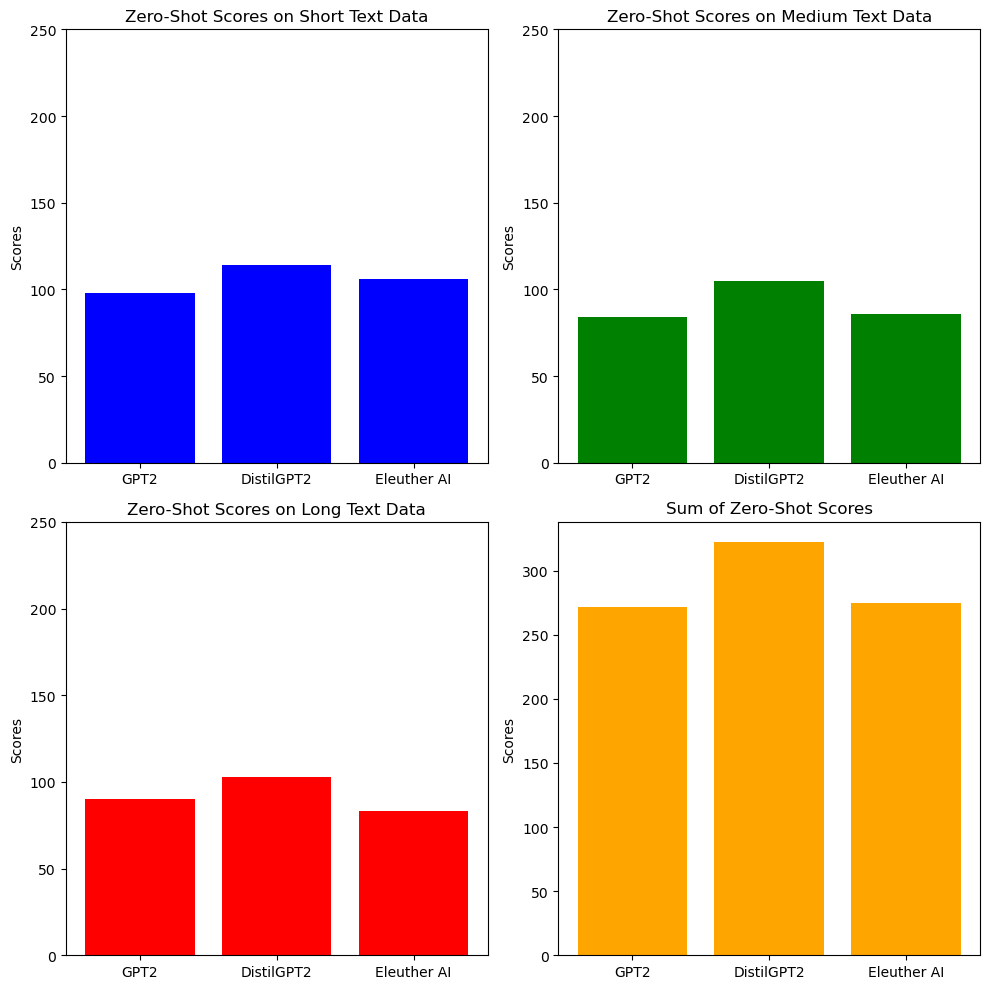

In [526]:
import matplotlib.pyplot as plt

# Data from the provided scores
scores_short = {'GPT2': 98, 'DistilGPT2': 114, 'Eleuther AI': 106}
scores_medium = {'GPT2': 84, 'DistilGPT2': 105, 'Eleuther AI': 86}
scores_long = {'GPT2': 90, 'DistilGPT2': 103, 'Eleuther AI': 83}

# Extract model names and their corresponding scores
models = list(scores_short.keys())
scores_short_values = list(scores_short.values())
scores_medium_values = list(scores_medium.values())
scores_long_values = list(scores_long.values())

# Calculate sum of corresponding models
sum_scores = [
    scores_short['GPT2'] + scores_medium['GPT2'] + scores_long['GPT2'],
    scores_short['DistilGPT2'] + scores_medium['DistilGPT2'] + scores_long['DistilGPT2'],
    scores_short['Eleuther AI'] + scores_medium['Eleuther AI'] + scores_long['Eleuther AI']
]

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))  # Square format

# Plot for each score dataset
axs[0, 0].bar(models, scores_short_values, color='b')
axs[0, 0].set_title('Zero-Shot Scores on Short Text Data')
axs[0, 0].set_ylabel('Scores')
axs[0, 0].set_ylim(0, 250)  # Set y-axis limit

axs[0, 1].bar(models, scores_medium_values, color='g')
axs[0, 1].set_title('Zero-Shot Scores on Medium Text Data')
axs[0, 1].set_ylabel('Scores')
axs[0, 1].set_ylim(0, 250)  # Set y-axis limit

axs[1, 0].bar(models, scores_long_values, color='r')
axs[1, 0].set_title('Zero-Shot Scores on Long Text Data')
axs[1, 0].set_ylabel('Scores')
axs[1, 0].set_ylim(0, 250)  # Set y-axis limit

axs[1, 1].bar(models, sum_scores, color='orange')
axs[1, 1].set_title('Sum of Zero-Shot Scores')
axs[1, 1].set_ylabel('Scores')

# Adjust layout
plt.tight_layout()
plt.show()


FINAL RESULTS: 
---

* Short Text Data (25 to 30 char-long reviews)
  --------------------------------------------
* ElutherAI model has the highest accuracy score with 134 out of 250 reviews in terms of sentiment analysis.
* ElutherAI model has the lowest difference rate with 5.76 out of 10 in terms of sentiment analysis.
* DistilGPT2 model has the highest zero-shot classification score with 114 correct topic matches out of 250.

* Medium Text Data (30 to 40 char-long reviews)
  ---------------------------------------------
* ElutherAI model has the highest accuracy score with 129 out of 250 reviews in terms of sentiment analysis.
* DistilGPT2 model has the lowest difference rate with 4.57 out of 10 in terms of sentiment analysis.
* DistilGPT2 model has the highest zero-shot classification score with 105 correct topic matches out of 250.

* Long Text Data (40 to 50 char-long reviews)
  -------------------------------------------
* DistilGPT2 model has the highest accuracy score with 139 out of 250 reviews in terms of sentiment analysis.
* GPT2 model has the lowest difference rate with 5.47 out of 10 in terms of sentiment analysis.
* DistilGPT2 model has the highest zero-shot classification score with 103 correct topic matches out of 250.

* When star ratings between original text and generated text differ in sentiment analysis, we tried to find the 
model which has the smallest difference in total, using means of differences between expected star rates and 
generated star rates.